In [1]:
import pandas as pd

In [2]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [4]:
# Группируем таблицу по дате и названию страны и рассчитываем 
# суммарные показатели по всем регионам
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

# Преобразуем даты в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Создадим признак больных на данный момент (active)
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

#Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [6]:
covid_data['date'].max()

Timestamp('2021-05-29 00:00:00')

In [7]:
vaccinations_data['date'].max()

Timestamp('2021-09-06 00:00:00')

In [8]:
covid_df = covid_data.merge(vaccinations_data, how ='left', on=['date', 'country'])
covid_df.shape

(86785, 16)

In [9]:
covid_df['death_rate']=covid_df['deaths']*100/covid_df['confirmed']
covid_df['recover_rate']=covid_df['recovered']*100/covid_df['confirmed']
covid_df[covid_df['country']=='United States'] ['death_rate'].max()

7.189542483660131

In [10]:
covid_df[covid_df['country']=='Russia'] ['recover_rate'].mean()

67.06273489477657

In [19]:
! pip install matplotlib

     ---------------------------------------- 7.5/7.5 MB 6.9 MB/s eta 0:00:00
     ------------------------------------- 470.4/470.4 kB 14.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


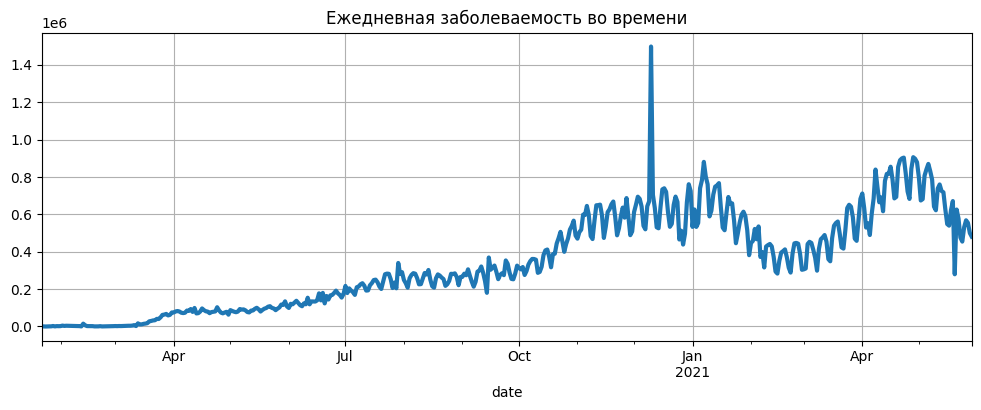

In [26]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

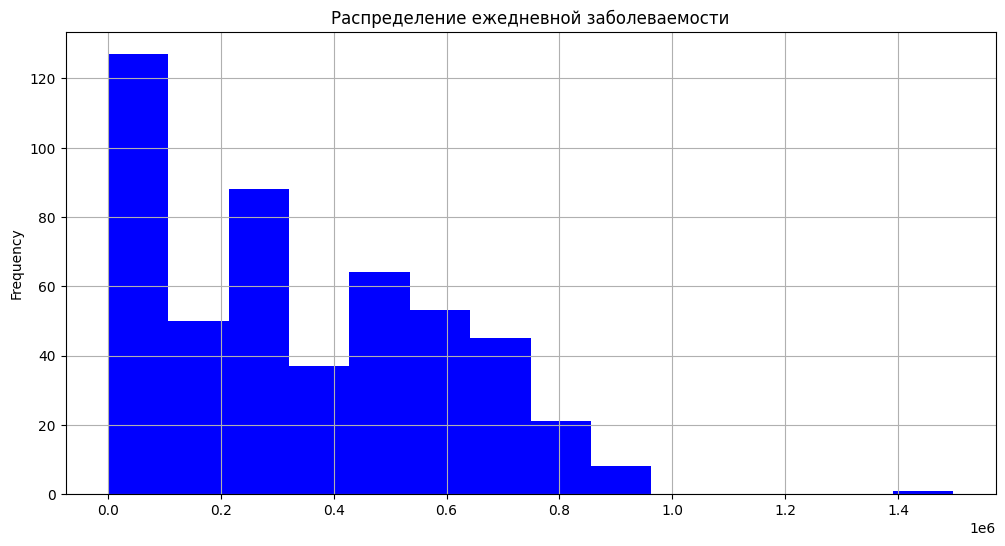

In [51]:
grouped_cases.plot(
    kind='hist',
    figsize=(12, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'blue',
    bins=14
);

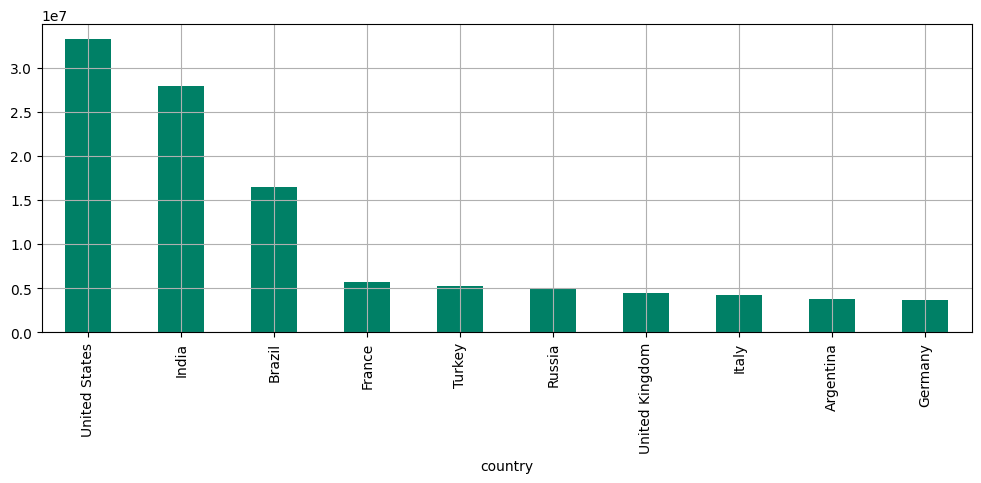

In [48]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='summer'
);

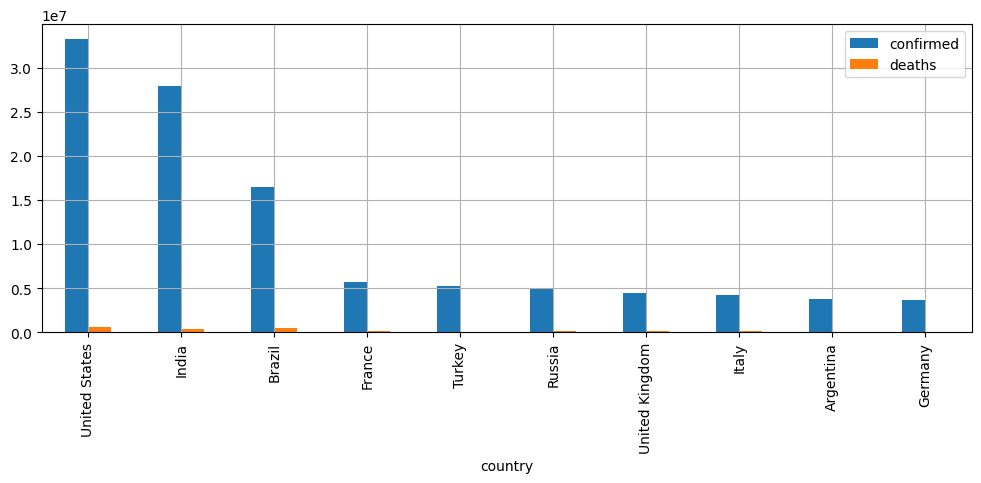

In [54]:
# отобразим сразу два показателя на столбчатой диаграмме: 
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

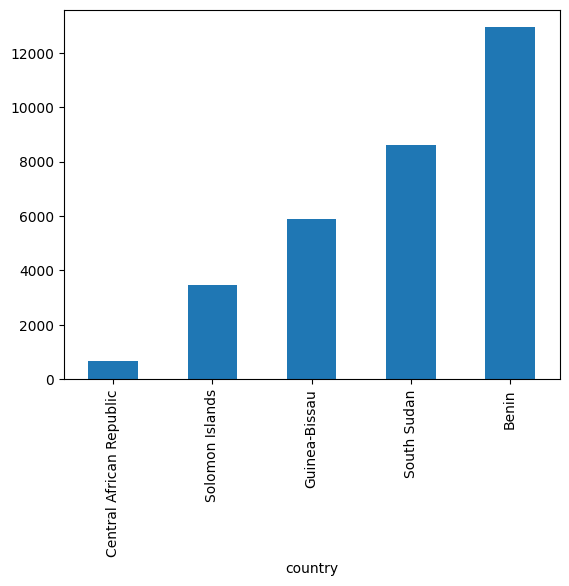

In [55]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [11]:
covid_df.to_csv('data/covid_df.csv', index=False, sep=';')